# HIV Kinda Sucks
By: Michael Remley

Patent Pending

In [18]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [29]:
def make_system(β,μ,Γ,τ,ρ,δ,α,σ,π):
    """Make a system object for the RLEV model.
    
    β,μ,Γ,τ,ρ,δ,α,σ,π = see Table in paper
    
    returns: System object
    """
    init = State(R=1000,L=0,E=0,V=100)

    t0 = 0
    t_end = 30 * 24

    return System( β=β/24, μ=μ/24, Γ=Γ/24, τ=τ/24, ρ=ρ/24, δ=δ/24, α=α/24, σ=σ/24, π=π/24, 
                  t0=t0, t_end=t_end,init=init)

In [30]:
def update_func(state,t,system):
    """Update the RLEV model.
    
    state: State (R,L,E,V)
    t: time
    system: System object
    
    returns: State (sir)
    """
    r,l,e,v = state
    β,μ,Γ,τ,ρ,δ,α,σ,π,t_0,t_end,init = system
    
    dRdt = Γ*τ - μ*r - β*r*v
    dLdt = ρ*β*r*v - μ*l - α*l
    dEdt = (1 - ρ)*β*r*v - α*l - δ*e
    dVdt = π*e - σ*v
    
    r += dRdt
    l += dLdt
    e += dEdt
    v += dVdt
    
    return State(R=r, L=l, E=e, V=v)



In [31]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=system.init.index)
    frame.row[t0] = system.init
    
    for t in linrange(system.t0, system.t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [32]:
system = make_system(0.00027,
                1.36E-3,
                1.36,
                0.2,
                0.1,
                0.33,
                3.6E-2,
                2,
                100)
results = run_simulation(system, update_func)


,R,L,E,V
0,1000,0,0,100
1,998.819,0.0046875,1.12031,91.6667
2,997.733,0.008972,2.13064,88.6957
3,996.681,0.0131062,3.09275,90.1821
4,995.614,0.0172991,4.05717,95.5534
5,994.488,0.0217316,5.06716,104.495
6,993.263,0.026569,6.16168,116.901
7,991.901,0.0319704,7.37774,132.833
8,990.363,0.0380967,8.75234,152.504
9,988.608,0.0451172,10.324,176.263


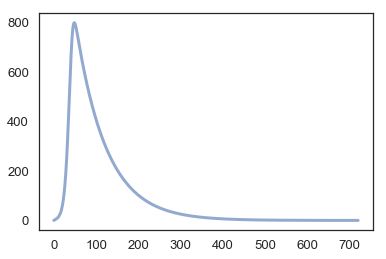

In [37]:
plot(results.E)

In [28]:
?linrange